<span style="color: purple;">**ИТОГОВЫЙ ПРОЕКТ НА ТЕМУ: АНАЛИЗ ДАННЫХ О ФОНДОВОМ РЫНКЕ И РАЗРАБОТКА МОДЕЛЕЙ ДЛЯ ПРОГНОЗИРОВАНИЯ ЦЕНЫ АКЦИИ**</span>

В начале работы настраиваем проверку кода линтерами. Для этого необходимо установить pycodestyle. Утилита pycodestyle проверяет код на Python на соответствие стандартам PEP 8.

In [1]:
!pip install pycodestyle pycodestyle_magic

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%load_ext pycodestyle_magic

In [3]:
%pycodestyle_on

<span style="color: orange;">**1. Проведение разведочного анализа данных (Exploratory Data Analysis - EDA).**</span>

Импортируем необходимые библиотеки для работы с массивами данных, обработки, анализа структурированных табличных данных, выполнения математических операций и визуализации данных.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем данные из csv-файла. Прописывается путь, где размещен файл с данными, затем с помощью функции pd.read_csv() выполняется чтение данных из csv-файла.

In [5]:
dataset = "C:/Users/Алла/Desktop/Итоговый проект/stock_details_5_years.csv"

In [6]:
data = pd.read_csv(dataset)
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


Набор данных взят с сайта www.kaggle.com и содержит исторические данные о фондовом рынке, извлеченные из Yahoo Finance. Набор данных включает следующие столбцы: дата, соответствующая зафиксированным данным фондового рынка; цена открытия торгов акциями на указанную дату; максимальная цена акции, достигнутая в течение торгового дня; минимальная цена акции, зафиксированная в течение торгового дня; цена закрытия торгов акциями на определенную дату; объем акций, проданных в указанную дату; дивидендные выплаты, произведенные компанией на эту дату; информация о дроблении акций, произошедшем в указанную дату; краткое буквенное обозначение компании. Набор данных содержит 602 962 строки и 9 столбцов.

С помощью метода info() выводим краткую оценку структуры и качества набора данных: количество строк и столбцов, названия и тип данных столбцов, количество ненулевых значений в столбцах, общее использование памяти. Данный метод удобен тем, что собирает в единое целое краткую информацию о наборе данных.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


С помощью метода describe() выводим статистические характеристики числовых столбцов: количество заполненных строк в каждом столбце; среднее значение; стандартное отклонение, показывающее разброс значений; минимальное и максимальное значения; значения по процентилям, показывающие распределение значений в выборке.

In [8]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


В наборе данных содержится информация по акциям 491 компании. Для вывода всех компаний и подсчета их количества используем методы unique() и nunique().

In [9]:
unique_values_Company = data["Company"].unique()
unique_values_Company

array(['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'LLY',
       'V', 'TSM', 'UNH', 'AVGO', 'NVO', 'JPM', 'WMT', 'XOM', 'MA', 'JNJ',
       'PG', 'ORCL', 'HD', 'ADBE', 'ASML', 'CVX', 'COST', 'TM', 'MRK',
       'KO', 'ABBV', 'BAC', 'PEP', 'FMX', 'CRM', 'SHEL', 'ACN', 'NFLX',
       'MCD', 'AMD', 'LIN', 'NVS', 'AZN', 'CSCO', 'TMO', 'BABA', 'INTC',
       'PDD', 'SAP', 'ABT', 'TMUS', 'PFE', 'DIS', 'NKE', 'CMCSA', 'DHR',
       'INTU', 'TTE', 'WFC', 'VZ', 'BHP', 'HDB', 'HSBC', 'PM', 'QCOM',
       'IBM', 'AMGN', 'TXN', 'NOW', 'BA', 'COP', 'UNP', 'BX', 'SPGI',
       'UPS', 'GE', 'MS', 'HON', 'CAT', 'AMAT', 'BUD', 'AXP', 'RY', 'NEE',
       'UL', 'SNY', 'RTX', 'T', 'LOW', 'SBUX', 'RIO', 'TD', 'SYK', 'BLK',
       'LMT', 'GS', 'ELV', 'ISRG', 'BKNG', 'SONY', 'MDT', 'PLD', 'SCHW',
       'DE', 'MUFG', 'BP', 'TJX', 'BMY', 'PBR', 'MMC', 'MDLZ', 'AMT',
       'PGR', 'LRCX', 'SHOP', 'ADP', 'EQNR', 'GILD', 'CB', 'ADI', 'PANW',
       'VRTX', 'ETN', 'UBS', 'CVS', 'C', 'REGN', 'KKR', 'M

In [10]:
count_Company = data["Company"].nunique()
print("Количество компаний:")
print(count_Company)

Количество компаний:
491


Преобразовав с помощью pivot строки с указанием компаний в столбцы, выводим цену закрытия торгов по датам в виде нового датасета data_Close. Такое преобразование позволяет понять, что по некоторым компаниям данные имеются не по всем датам. Методом isnull().sum() подсчитываем количество пропущенных значений. Затем полученную информацию преобразуем в DataFrame. Методом reset_index() преобразуем индекс в столбец. С помощью функции rename() переименовываем столбец с количеством пропущенных значений.

In [11]:
data_Close = data.pivot(index="Date", columns="Company", values="Close")
data_Close

Company,A,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,XEL,XOM,XYL,YUM,ZBH,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-29 00:00:00-05:00,69.001251,43.083508,71.184914,3.631820,NaN,67.365654,28.379999,150.171722,249.089996,81.795799,...,147.668747,21.815151,44.753716,61.217907,67.074562,83.960030,107.434830,NaN,37.560001,89.673248
2018-11-30 00:00:00-05:00,69.753235,42.850754,74.636864,3.606481,NaN,68.092094,28.620001,153.388290,250.889999,83.988708,...,148.563202,21.545931,45.552742,61.558617,68.655006,84.289078,109.359970,NaN,39.259998,90.736526
2018-12-03 00:00:00-05:00,71.989975,44.348064,74.153923,3.648712,NaN,68.294380,28.389999,155.532669,255.259995,85.441521,...,150.137817,21.619356,45.978298,62.890438,68.015305,84.151978,108.817947,NaN,39.119999,90.446533
2018-12-04 00:00:00-05:00,70.293159,42.397247,71.691612,3.606481,NaN,65.747253,27.940001,153.099289,245.820007,82.636406,...,146.569305,20.493515,45.882774,61.504402,64.007759,82.881523,104.659248,NaN,37.209999,87.546684
2018-12-06 00:00:00-05:00,69.329056,41.924541,71.517448,3.522021,NaN,65.784035,27.750000,148.474899,250.630005,81.804947,...,145.441925,21.815151,46.212795,60.699108,62.869465,83.631004,105.519012,NaN,42.980000,87.392029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00-05:00,123.989998,191.309998,138.470001,2.760000,129.039993,102.699997,85.949997,333.130005,619.719971,182.669998,...,244.470001,31.990000,60.430000,104.010002,102.220001,128.332977,113.830002,63.830002,190.639999,179.350006
2023-11-24 00:00:00-05:00,126.620003,189.970001,138.669998,2.750000,128.369995,102.870003,86.599998,334.040009,619.429993,183.050003,...,244.279999,31.940001,60.520000,104.570000,103.260002,127.904991,113.430000,64.529999,193.089996,180.210007
2023-11-27 00:00:00-05:00,125.010002,189.789993,139.089996,2.760000,129.000000,102.709999,87.000000,332.429993,619.270020,183.770004,...,245.039993,31.620001,60.450001,103.959999,103.180000,127.690002,113.839996,65.550003,191.910004,178.789993


In [12]:
mis_val = data_Close.isnull().sum()
mis_val

Company
A         0
AAPL      0
ABBV      0
ABEV      0
ABNB    511
       ... 
YUM       0
ZBH       0
ZM       95
ZS        0
ZTS       0
Length: 491, dtype: int64

In [13]:
df_mis_val = pd.DataFrame(mis_val)
df_mis_val

,0
Company,
A,0
AAPL,0
ABBV,0
ABEV,0
ABNB,511
...,...
YUM,0
ZBH,0
ZM,95


In [14]:
df_mis_val_new = df_mis_val.reset_index()
df_mis_val_new

,Company,0
0,A,0
1,AAPL,0
2,ABBV,0
3,ABEV,0
4,ABNB,511
...,...,...
486,YUM,0
487,ZBH,0
488,ZM,95
489,ZS,0


In [15]:
df_mis_val_new = df_mis_val_new.rename(columns={0: "Mis_val_count"})
df_mis_val_new

,Company,Mis_val_count
0,A,0
1,AAPL,0
2,ABBV,0
3,ABEV,0
4,ABNB,511
...,...,...
486,YUM,0
487,ZBH,0
488,ZM,95
489,ZS,0


Таким образом, выводим перечень компаний с пропущенными значениями.

In [16]:
Company_mis_val = df_mis_val_new[df_mis_val_new["Mis_val_count"] != 0]
Company_mis_val

,Company,Mis_val_count
4,ABNB,511
19,ALC,88
38,ARM,1204
54,BEKE,428
67,BNTX,216
78,CARR,326
88,CEG,789
103,COIN,595
108,CPNG,572
113,CRWD,132


Пропущенные значения заменяем на «серединное» значение упорядоченного ряда чисел – медиану, используя функцию fillna(). 

In [17]:
for i in data_Close.columns:
    data_Close[i].fillna(data_Close[i].median(),inplace=True)

C:\Users\Алла\AppData\Local\Temp\ipykernel_12532\564119788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_Close[i].fillna(data_Close[i].median(),inplace=True)
2:48: E231 missing whitespace after ','


In [18]:
data_Close

Company,A,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,XEL,XOM,XYL,YUM,ZBH,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-29 00:00:00-05:00,69.001251,43.083508,71.184914,3.631820,137.210007,67.365654,28.379999,150.171722,249.089996,81.795799,...,147.668747,21.815151,44.753716,61.217907,67.074562,83.960030,107.434830,106.099998,37.560001,89.673248
2018-11-30 00:00:00-05:00,69.753235,42.850754,74.636864,3.606481,137.210007,68.092094,28.620001,153.388290,250.889999,83.988708,...,148.563202,21.545931,45.552742,61.558617,68.655006,84.289078,109.359970,106.099998,39.259998,90.736526
2018-12-03 00:00:00-05:00,71.989975,44.348064,74.153923,3.648712,137.210007,68.294380,28.389999,155.532669,255.259995,85.441521,...,150.137817,21.619356,45.978298,62.890438,68.015305,84.151978,108.817947,106.099998,39.119999,90.446533
2018-12-04 00:00:00-05:00,70.293159,42.397247,71.691612,3.606481,137.210007,65.747253,27.940001,153.099289,245.820007,82.636406,...,146.569305,20.493515,45.882774,61.504402,64.007759,82.881523,104.659248,106.099998,37.209999,87.546684
2018-12-06 00:00:00-05:00,69.329056,41.924541,71.517448,3.522021,137.210007,65.784035,27.750000,148.474899,250.630005,81.804947,...,145.441925,21.815151,46.212795,60.699108,62.869465,83.631004,105.519012,106.099998,42.980000,87.392029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00-05:00,123.989998,191.309998,138.470001,2.760000,129.039993,102.699997,85.949997,333.130005,619.719971,182.669998,...,244.470001,31.990000,60.430000,104.010002,102.220001,128.332977,113.830002,63.830002,190.639999,179.350006
2023-11-24 00:00:00-05:00,126.620003,189.970001,138.669998,2.750000,128.369995,102.870003,86.599998,334.040009,619.429993,183.050003,...,244.279999,31.940001,60.520000,104.570000,103.260002,127.904991,113.430000,64.529999,193.089996,180.210007
2023-11-27 00:00:00-05:00,125.010002,189.789993,139.089996,2.760000,129.000000,102.709999,87.000000,332.429993,619.270020,183.770004,...,245.039993,31.620001,60.450001,103.959999,103.180000,127.690002,113.839996,65.550003,191.910004,178.789993


Используя датасет data_Close подсчитываем функцией mean() среднюю цену закрытия торгов по компаниям за весь период наблюдения и преобразовываем полученные данные в DataFrame. 

In [19]:
Close_mean = data_Close.mean(axis=0, numeric_only=True)
print("Средняя цена закрытия торгов по компаниям за весь период наблюдения:")
print(Close_mean)

Средняя цена закрытия торгов по компаниям за весь период наблюдения:
Company
A       111.862449
AAPL    118.992628
ABBV    104.811102
ABEV      2.945837
ABNB    138.458842
           ...    
YUM     107.732138
ZBH     126.215307
ZM      168.821307
ZS      143.463382
ZTS     153.390256
Length: 491, dtype: float64


In [20]:
df_Close_mean = pd.DataFrame(Close_mean)
df_Close_mean

,0
Company,
A,111.862449
AAPL,118.992628
ABBV,104.811102
ABEV,2.945837
ABNB,138.458842
...,...
YUM,107.732138
ZBH,126.215307
ZM,168.821307


In [21]:
df_Close_mean_new = df_Close_mean.reset_index()
df_Close_mean_new

,Company,0
0,A,111.862449
1,AAPL,118.992628
2,ABBV,104.811102
3,ABEV,2.945837
4,ABNB,138.458842
...,...,...
486,YUM,107.732138
487,ZBH,126.215307
488,ZM,168.821307
489,ZS,143.463382


In [22]:
df_Close_mean_new = df_Close_mean_new.rename(columns={0: "Close_mean"})
df_Close_mean_new

,Company,Close_mean
0,A,111.862449
1,AAPL,118.992628
2,ABBV,104.811102
3,ABEV,2.945837
4,ABNB,138.458842
...,...,...
486,YUM,107.732138
487,ZBH,126.215307
488,ZM,168.821307
489,ZS,143.463382


In [23]:
df_Close_mean_new.describe()

,Close_mean
count,491.000000
mean,138.033386
std,260.781588
min,2.102599
25%,42.389239
50%,80.821562
75%,154.630123
max,4369.628335


Имеется существенный разброс в данных. Построим диаграмму рассеяния значений средней цены закрытия торгов по компаниям за весь период наблюдения. Используем функцию plt.scatter().

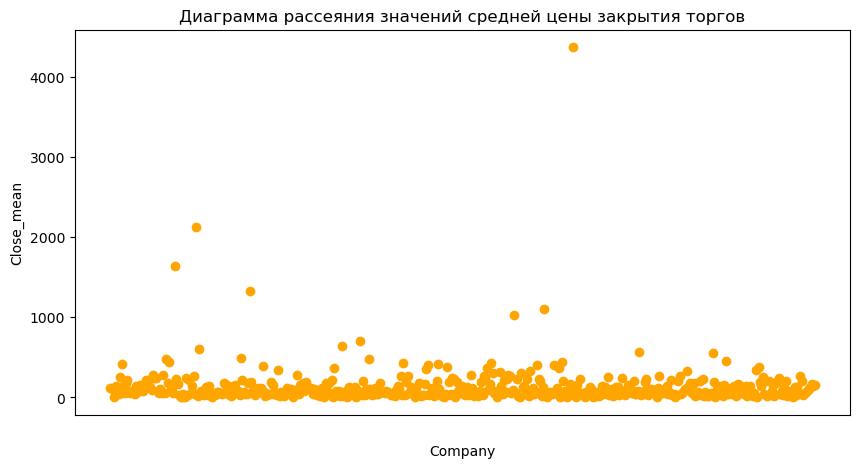

In [24]:
x = df_Close_mean_new["Company"]
y = df_Close_mean_new["Close_mean"]
plt.figure(figsize=(10, 5))
plt.rc("xtick", color="white")
plt.tick_params(axis="both", which="major", labelsize=10)
plt.scatter(x, y, color="orange")
plt.xlabel("Company")
plt.ylabel("Close_mean")
plt.title("Диаграмма рассеяния значений средней цены закрытия торгов")
plt.show()

В данных есть несколько значений, существенно отклоняющихся от среднего значения.

Ориентируясь по графику, выводим перечень компаний, по которым наблюдается существенное отклонение от среднего значения в большую сторону.

In [25]:
df_Close_mean_new.loc[df_Close_mean_new["Close_mean"] > 1000]

,Company,Close_mean
45,AZO,1645.242242
60,BKNG,2126.469873
97,CMG,1324.551017
281,MELI,1032.793749
302,MTD,1107.243361
322,NVR,4369.628335


Столбец «Date», содержащий информацию о датах, имеет тип данных object. Для дальнейшего исследования данных необходимо его преобразование. Сначала с помощью метода astype(str) преобразуем в строковый тип данных, затем с помощью метода str.slice() извлекаем часть строки: год, месяц, день,  указанные через дефис. Далее методом to_datetime() преобразуем данные в формат datetime для дальнейшего выделения в отдельные столбцы года, месяца, дня с помощью атрибутов dt.year, dt.month, dt.day. 

In [26]:
data["Date"] = data["Date"].astype(str)
data["Date"] = data["Date"].str.slice(0, 10)
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


In [27]:
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
0,2018-11-29,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL,2018,11,29
1,2018-11-29,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT,2018,11,29
2,2018-11-29,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL,2018,11,29
3,2018-11-29,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN,2018,11,29
4,2018-11-29,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
602957,2023-11-29,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL,2023,11,29
602958,2023-11-29,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB,2023,11,29
602959,2023-11-29,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF,2023,11,29
602960,2023-11-29,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ,2023,11,29


С помощью возможностей библиотеки Matplotlib визуализируем динамику изменения цены закрытия торгов за весь период наблюдения по выбранной компании, а также одновременно по трем компаниям для сравнительного анализа. Смотреть на графике динамику одновременно всех компаний неудобно по причине количества компаний, поэтому можно посмотреть динамику по одной или трем компаниям. Информацию с кратким буквенным обозначением компании необходимо ввести в поле для ввода данных Input.  

Enter Company Name:  A


Text(0.5, 1.0, 'Динамика изменения цены закрытия торгов по выбранной компании')

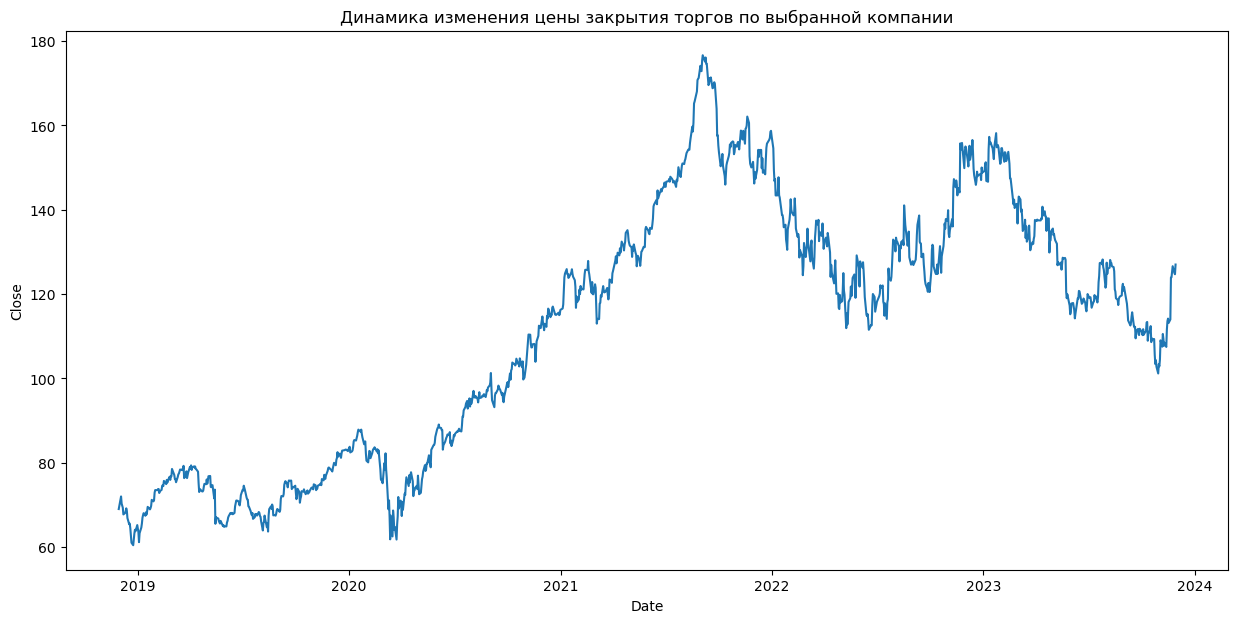

In [28]:
company = input("Enter Company Name: ")
plt.figure(figsize=(15, 7))
plt.rc("xtick", color="black")
sns.lineplot(x="Date", y="Close", data=data[data["Company"] == company])
plt.title("Динамика изменения цены закрытия торгов по выбранной компании")

Enter Company Name:  GOOGL
Enter Company Name:  FITB
Enter Company Name:  LYV


Text(0.5, 1.0, 'Динамика изменения цены закрытия торгов по выбранным компаниям')

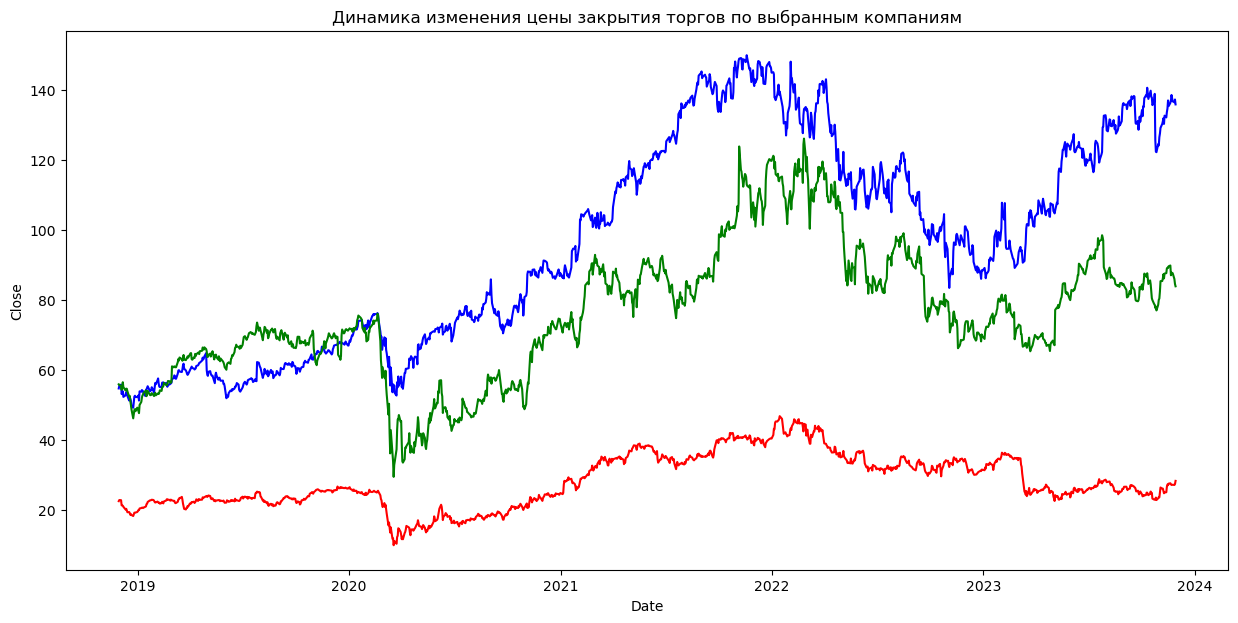

In [29]:
c_1 = input("Enter Company Name: ")
c_2 = input("Enter Company Name: ")
c_3 = input("Enter Company Name: ")
plt.figure(figsize=(15, 7))
plt.rc("xtick", color="black")
sns.lineplot(x="Date", y="Close", data=data[data["Company"] == c_1], color="b")
sns.lineplot(x="Date", y="Close", data=data[data["Company"] == c_2], color="r")
sns.lineplot(x="Date", y="Close", data=data[data["Company"] == c_3], color="g")
plt.title("Динамика изменения цены закрытия торгов по выбранным компаниям")

Удаляем ранее преобразованный столбец «Date» функцией drop().

In [30]:
data_new = data.drop(["Date"], axis=1)
data_new

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Month,Day
0,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL,2018,11,29
1,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT,2018,11,29
2,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL,2018,11,29
3,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN,2018,11,29
4,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...
602957,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL,2023,11,29
602958,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB,2023,11,29
602959,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF,2023,11,29
602960,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ,2023,11,29


Выводим среднюю по годам цену закрытия торгов по компаниям. Находим среднее значение столбца «Close» для каждой комбинации значений столбцов «Company» и «Year»: groupby(["Company", "Year"])["Close"].mean(). Затем полученные результаты преобразуем в DataFrame и выводим динамику изменения средней по годам цены закрытия торгов за весь период наблюдений по всем компаниям.

In [31]:
y_Close = data_new.groupby(["Company", "Year"])["Close"].mean()
print("Средняя по годам цена закрытия торгов по компаниям:")
print(y_Close)

Средняя по годам цена закрытия торгов по компаниям:
Company  Year
A        2018     66.438090
         2019     72.929442
         2020     90.516794
         2021    142.471051
         2022    131.681523
                    ...    
ZTS      2019    107.136584
         2020    141.352767
         2021    185.217927
         2022    169.156711
         2023    171.615852
Name: Close, Length: 2874, dtype: float64


In [32]:
df_y_Close = pd.DataFrame(y_Close)
df_y_Close

Close
Company Year            
A       2018   66.438090
        2019   72.929442
        2020   90.516794
        2021  142.471051
        2022  131.681523
...                  ...
ZTS     2019  107.136584
        2020  141.352767
        2021  185.217927
        2022  169.156711
        2023  171.615852

[2874 rows x 1 columns]

In [33]:
df_y_Close = df_y_Close.reset_index()
df_y_Close

,Company,Year,Close
0,A,2018,66.438090
1,A,2019,72.929442
2,A,2020,90.516794
3,A,2021,142.471051
4,A,2022,131.681523
...,...,...,...
2869,ZTS,2019,107.136584
2870,ZTS,2020,141.352767
2871,ZTS,2021,185.217927
2872,ZTS,2022,169.156711


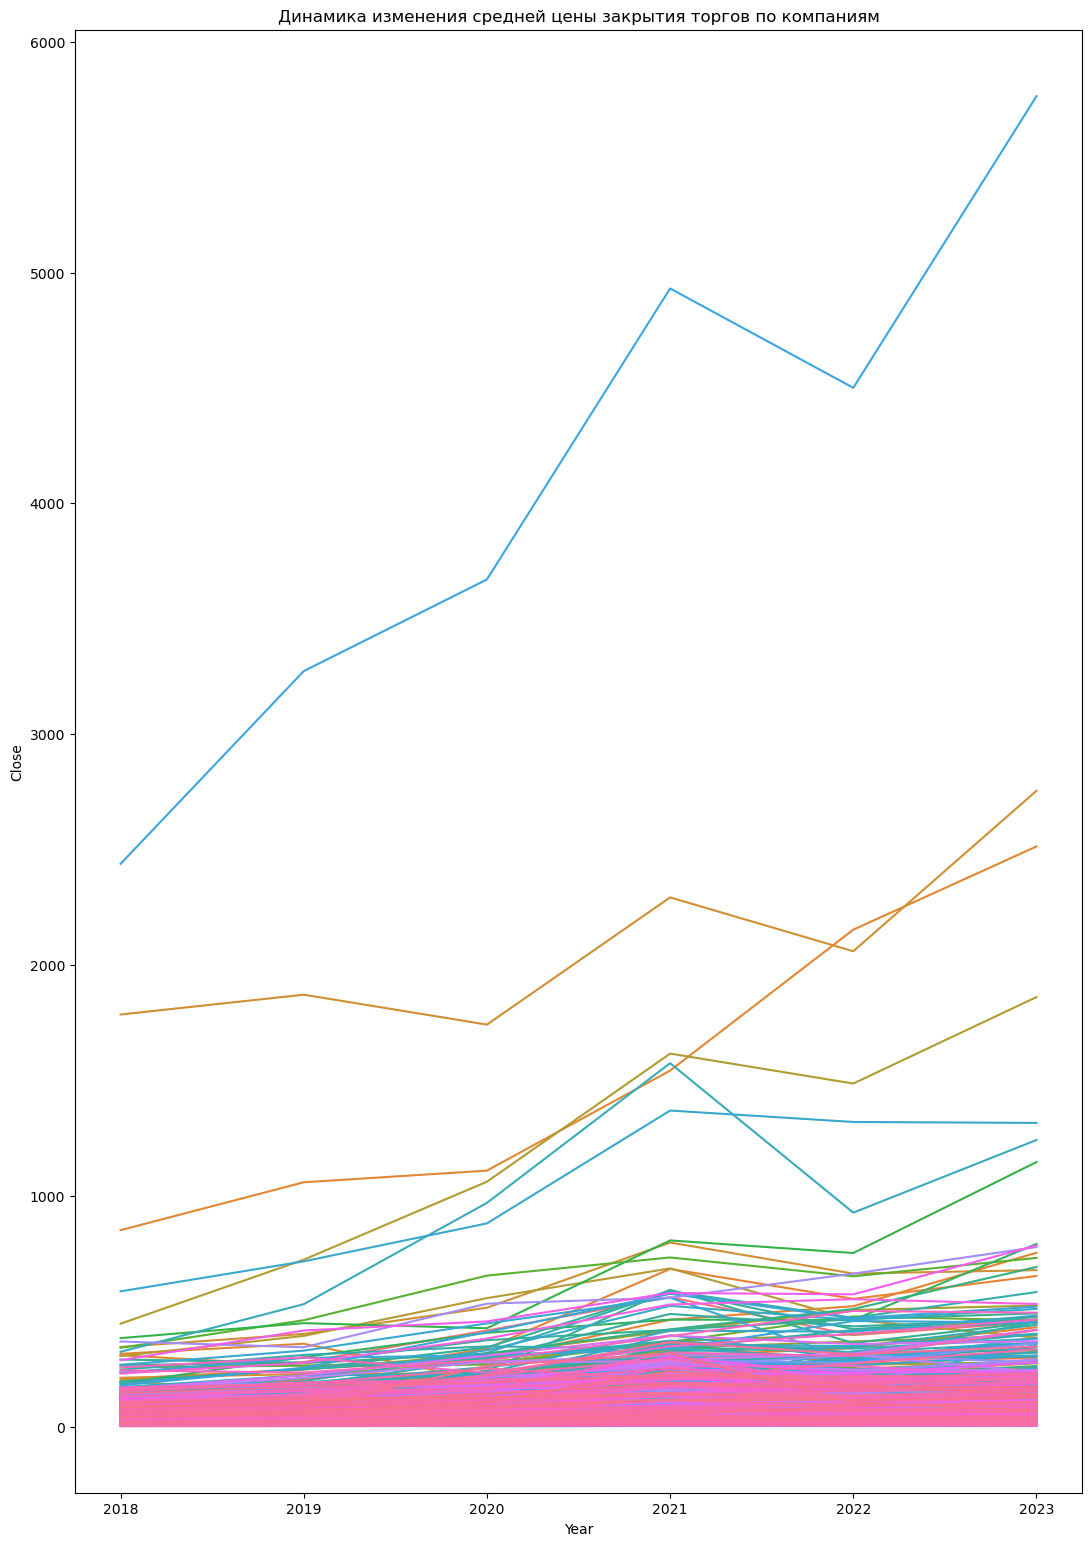

In [34]:
plt.figure(figsize=(13, 19))
sns.lineplot(data=df_y_Close, x="Year", y="Close", hue="Company", legend=None)
plt.title("Динамика изменения средней цены закрытия торгов по компаниям")
plt.show()

Большинство алгоритмов машинного обучения используют числовые типы данных. Столбец «Company» имеет тип данных object. Данные не имеют естественного порядка, поэтому для преобразования категориальных переменных в данном случае используем метод One Hot Encoding функцию pd.get_dummies(). 

In [35]:
data_encod = pd.get_dummies(data_new, columns=["Company"], prefix=["Company"])
data_encod

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,...,Company_WTW,Company_WY,Company_XEL,Company_XOM,Company_XYL,Company_YUM,Company_ZBH,Company_ZM,Company_ZS,Company_ZTS
0,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,2018,11,29,...,False,False,False,False,False,False,False,False,False,False
1,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,2018,11,29,...,False,False,False,False,False,False,False,False,False,False
2,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,2018,11,29,...,False,False,False,False,False,False,False,False,False,False
3,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,2018,11,29,...,False,False,False,False,False,False,False,False,False,False
4,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,2018,11,29,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602957,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,2023,11,29,...,False,False,False,False,False,False,False,False,False,False
602958,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,2023,11,29,...,False,False,False,False,False,False,False,False,False,False
602959,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,2023,11,29,...,False,False,False,False,False,False,False,False,False,False
602960,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,2023,11,29,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data_encod.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume           int64
                ...   
Company_YUM       bool
Company_ZBH       bool
Company_ZM        bool
Company_ZS        bool
Company_ZTS       bool
Length: 501, dtype: object

Создаем матрицу корреляции и визуализируем результат в виде тепловой карты. По результатам видно, что максимальная корреляция присутствует между ценой открытия торгов, ценой закрытия торгов, а также колебаниями в течение дня.

In [37]:
numeric_data = data_encod.select_dtypes(include=["float64", "int64", "int32"])
correlation_matrix = numeric_data.corr()
correlation_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
Open,1.000000,0.999910,0.999898,0.999807,-0.096096,0.009417,-0.001256,0.087829,0.012013,-0.000206
High,0.999910,1.000000,0.999868,0.999907,-0.095561,0.009310,-0.001234,0.087802,0.011525,-0.000345
Low,0.999898,0.999868,1.000000,0.999911,-0.096634,0.009484,-0.001278,0.087945,0.012402,-0.000014
Close,0.999807,0.999907,0.999911,1.000000,-0.096093,0.009396,-0.001259,0.087868,0.011861,-0.000219
Volume,-0.096096,-0.095561,-0.096634,-0.096093,1.000000,-0.008840,0.016015,-0.002585,-0.027505,-0.000635
Dividends,0.009417,0.009310,0.009484,0.009396,-0.008840,1.000000,0.001282,0.005146,0.005507,0.001983
Stock Splits,-0.001256,-0.001234,-0.001278,-0.001259,0.016015,0.001282,1.000000,0.001198,0.000255,0.000166
Year,0.087829,0.087802,0.087945,0.087868,-0.002585,0.005146,0.001198,1.000000,-0.092116,-0.006801
Month,0.012013,0.011525,0.012402,0.011861,-0.027505,0.005507,0.000255,-0.092116,1.000000,0.003762
Day,-0.000206,-0.000345,-0.000014,-0.000219,-0.000635,0.001983,0.000166,-0.006801,0.003762,1.000000


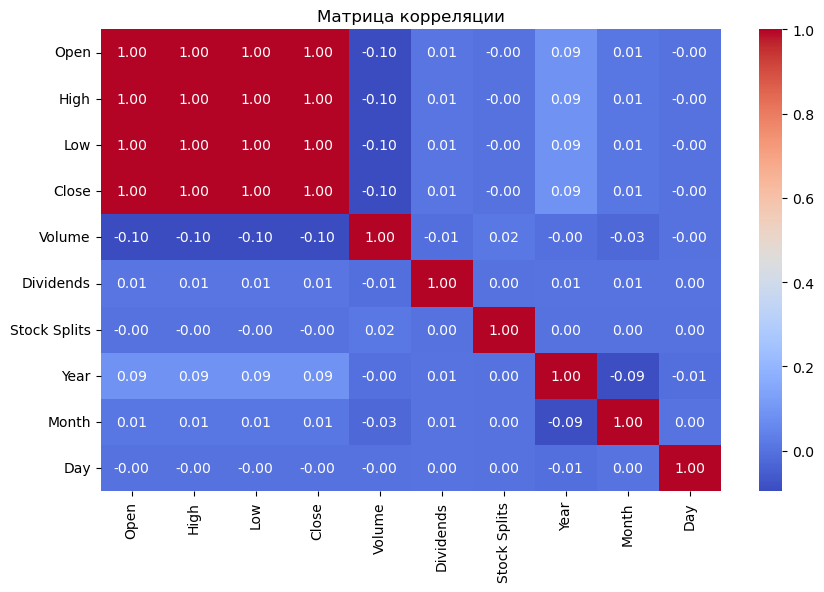

In [38]:
plt.figure(figsize=(10, 6))
plt.rc("xtick", color="black")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

Разделяем данные на целевую переменную и признаки. Целевой переменной назначается столбец «Close» с информацией о цене закрытия торгов. Все остальные столбцы – признаки.

In [39]:
X = data_encod.loc[:, data_encod.columns != "Close"]
y = data_encod["Close"]

Импортируем функцию train_test_split из подмодуля sklearn.model_selection библиотеки Scikit-learn. Разделяем набор данных на два подмножества: для обучения и для тестирования. Разделение данных на тренировочные и тестовые помогает избежать переобучения и обеспечивает объективную оценку производительности модели. В данном случае размер тестовой выборки составляет 20%.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Импортируем класс StandartScaler из модуля preprocessing библиотеки Scikit-learn. StandartScaler масштабирует признаки, то есть приводит данные к стандартному нормальному распределению с центром в нуле и стандартным отклонением, равным единице. Масштабируются только признаки, целевую переменную не масштабируем, поскольку масштабирование может изменить ее оригинальное значение, что приведет к неправильным прогнозам. StandartScaler используем, поскольку признаки имеют разный порядок чисел, не применение масштабирования может сказаться на качестве модели.  

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)